#Requirements


In [ ]:
!pip install pandas scikit-learn kagglehub

#import

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

import pandas as pd

import joblib

#Dataset Prepration

In [ ]:
df = pd.read_csv('/content/creditcard.csv').fillna(0)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.shape # rows and columns

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#Data Preprocssing

In [ ]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
df.drop(['Time'], axis=1, inplace=True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
df.shape

(284807, 30)

In [ ]:
df.duplicated().any()

np.True_

In [ ]:
dup = df.drop_duplicates()
dup.shape

(275663, 30)

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


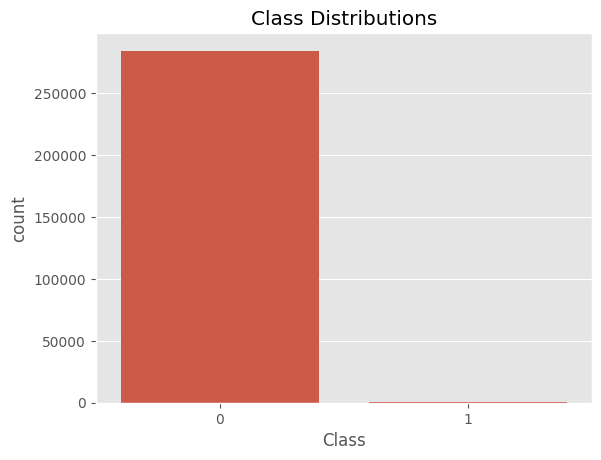

In [ ]:
plt.style.use('ggplot')

sns.countplot(x='Class', data=df)
plt.title('Class Distributions')
plt.show()

#ML Alg

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")
    print(f'Precision of {name}: {precision_score(y_test, y_pred)}')
    print(f'Recall of {name}: {recall_score(y_test, y_pred)}')
    print(f'F1 Score of {name}: {f1_score(y_test, y_pred)}')
    print()

Training Logistic Regression...
Accuracy of Logistic Regression: 0.9990871107053826
Precision of Logistic Regression: 0.8484848484848485
Recall of Logistic Regression: 0.5714285714285714
F1 Score of Logistic Regression: 0.6829268292682927

Training Random Forest...
Accuracy of Random Forest: 0.9995962220427653
Precision of Random Forest: 0.9746835443037974
Recall of Random Forest: 0.7857142857142857
F1 Score of Random Forest: 0.8700564971751412

Training Decision Tree...
Accuracy of Decision Tree: 0.9991397773954567
Precision of Decision Tree: 0.7247706422018348
Recall of Decision Tree: 0.8061224489795918
F1 Score of Decision Tree: 0.7632850241545893



In [ ]:
# @title Default title text
# under sampling

In [ ]:
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [ ]:
normal.shape

(284315, 30)

In [ ]:
fraud.shape

(492, 30)

In [ ]:
normal_sample = normal.sample(n=fraud.shape[0])

In [ ]:
# concatinate them
new_data = pd.concat([normal_sample, fraud],ignore_index=True)

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.878563,0.020785,-1.621113,2.908813,2.507847,4.709442,-0.830626,1.136154,-0.395755,1.311413,-0.945685,-0.007911,-0.341914,-0.121324,-1.531388,0.303652,-0.471434,-0.592712,-1.388681,-0.252053,0.079998,0.404327,0.121098,0.707538,0.140100,0.155684,0.016375,-0.053892,-0.353229,0
1,2.137626,-0.878636,-1.417160,-1.032485,-0.497679,-0.878475,-0.432434,-0.246977,-0.704133,1.035930,0.728831,-0.145310,0.004079,0.220535,-0.290471,1.227621,-0.233115,-0.623456,0.809600,0.046068,0.494624,1.333477,-0.095905,-0.302199,0.186703,0.074316,-0.047488,-0.072615,-0.162321,0
2,-0.988430,1.039774,1.893100,0.247034,0.038396,1.057292,-0.239187,0.780583,-0.385681,-0.857871,-0.394929,1.140813,1.349957,-0.262786,-0.739113,0.598816,-0.826679,0.950989,0.831761,-0.015090,0.008191,0.069897,-0.443029,-1.002461,0.541087,-0.310404,-0.009945,-0.001271,-0.333599,0
3,1.150564,0.026680,0.553099,0.522187,-0.483008,-0.351526,-0.218107,0.157386,0.010863,0.104047,1.612147,0.354629,-1.433948,0.797742,0.745522,0.223304,-0.229101,-0.364132,-0.255159,-0.215131,-0.180662,-0.614009,0.194396,0.175052,0.031285,0.099128,-0.027439,0.004773,-0.329281,0
4,-0.505385,0.525523,1.524373,-0.014753,0.634012,0.477400,0.627416,-0.093843,0.270896,-0.394427,-1.371103,-0.036252,0.145368,-0.591692,-0.285115,-0.613937,-0.053327,-0.608836,0.344696,-0.009898,-0.067857,0.212739,-0.240960,-0.709659,-0.092647,0.382244,-0.171371,-0.109642,-0.313249,0


In [ ]:
new_data['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
x = new_data.drop('Class', axis=1)
y = new_data['Class']

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}


for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")
    print(f'Precision of {name}: {precision_score(y_test, y_pred)}')
    print(f'Recall of {name}: {recall_score(y_test, y_pred)}')
    print(f'F1 Score of {name}: {f1_score(y_test, y_pred)}')
    print()

Training Logistic Regression...
Accuracy of Logistic Regression: 0.934010152284264
Precision of Logistic Regression: 0.967032967032967
Recall of Logistic Regression: 0.8979591836734694
F1 Score of Logistic Regression: 0.9312169312169312

Training Random Forest...
Accuracy of Random Forest: 0.9289340101522843
Precision of Random Forest: 0.9666666666666667
Recall of Random Forest: 0.8877551020408163
F1 Score of Random Forest: 0.925531914893617

Training Decision Tree...
Accuracy of Decision Tree: 0.8934010152284264
Precision of Decision Tree: 0.8737864077669902
Recall of Decision Tree: 0.9183673469387755
F1 Score of Decision Tree: 0.8955223880597015



#Model Generation

In [ ]:
rtc = RandomForestClassifier()
rtc.fit(x_train, y_train)

joblib.dump(rtc, 'random_forest_credit_card_model.pkl')

model = joblib.load('random_forest_credit_card_model.pkl')

test_data = [-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0,]

a = model.predict([test_data])
a

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
joblib.dump(dtc, 'credit_card_model.pkl')

['credit_card_model.pkl']

In [ ]:
model = joblib.load('credit_card_model.pkl')

#TestCase

In [ ]:
# model.predict(x_test)

test_data = [-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0,]

a = model.predict([test_data])

print(a)

if a==0:
    print("Normal Transaction")
else:
  print("Fraudulent Transaction")

[1]
Fraudulent Transaction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
test_data = [-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0,]
a = model.predict([test_data])
print(a)
if a[0] == 0:
    print("Normal Transaction")
else:
  print("Fraudulent Transaction")

[1]
Fraudulent Transaction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#Demo

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("sriharshaeedala/financial-fraud-detection-dataset", "/content/")

# print("Path to dataset files:", path)

# data = pd.read_csv(path)

# print(data.head())
# print(data.info())

In [ ]:
import kagglehub
import pandas as pd

data = pd.read_csv('/content/Synthetic_Financial_datasets_log.csv').fillna(0)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

print(data.head())
print(data.info())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 co

In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
data.duplicated().any()

np.False_

In [ ]:
dup = data.drop_duplicates()
dup.shape

(6362620, 11)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = data.drop(['step', 'nameOrig', 'nameDest'], axis=1)

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
# data.head()

In [ ]:
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


In [ ]:
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)  # Drop both target columns for X
y = data[['isFraud', 'isFlaggedFraud']]  # Select both target columns for y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred))


Random Forest Accuracy:  0.48833333333333334
Decision Tree Accuracy:  0.49766666666666665


In [ ]:
import joblib

joblib.dump(rf, 'random_forest_classification_credit_card_model.pkl')

model = joblib.load('random_forest_classification_credit_card_model.pkl')


In [ ]:
ab = [3,9839.64,170136.0,160296.36,0.0,0.0]
cd = [1,181.00,181.0,0.00,21182.0,0.0]

print(le.classes_)
print(le.transform(le.classes_))

print()

pred = dt.predict([cd])
pred

['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']
[0 1 2 3 4]



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but DecisionTreeClassifier is expecting 11 features as input.

In [ ]:
model.predict([cd])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but RandomForestClassifier is expecting 11 features as input.

In [ ]:
import joblib

model = joblib.load('random_forest_classification_credit_card_model.pkl')

ab = [3,9839.64,170136.0,160296.36,0.0,0.0]

cd = [1,181.00,181.0,0.00,21182.0,0.0]

result = model.predict([ab])

print(result)

# ['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']
# [0 1 2 3 4]

[[0. 0.]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#Demo 2

In [ ]:
!pip install pandas numpy geopy scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from geopy.distance import geodesic

# Load dataset
df = pd.read_csv("/content/fraud_detection_dataset_5000.csv")

# Compute geographical movement distance
def calculate_distance(row):
    return geodesic(
        (row["location_latitude"], row["location_longitude"]),
        (row["last_location_latitude"], row["last_location_longitude"])
    ).kilometers

df["location_change_distance"] = df.apply(calculate_distance, axis=1)

# Device change indicator
df["device_changed"] = (df["device"] != df["last_device"]).astype(int)

# IP change indicator
df["ip_changed"] = (df["ip_address"] != df["last_ip"]).astype(int)

# Encode categorical features
label_enc = LabelEncoder()
df["device"] = label_enc.fit_transform(df["device"])
df["last_device"] = label_enc.transform(df["last_device"])

# Drop unnecessary columns
df.drop(columns=["user_id", "ip_address", "last_ip", "last_location_latitude", "last_location_longitude"], inplace=True)

# Feature Scaling
scaler = StandardScaler()
df[["amount", "failed_logins", "rapid_transactions", "location_change_distance"]] = scaler.fit_transform(
    df[["amount", "failed_logins", "rapid_transactions", "location_change_distance"]]
)

# Separate features and labels
X = df.drop(columns=["fraud_label"])
y = df["fraud_label"]

In [ ]:
df.head(2)

,amount,location_latitude,location_longitude,device,last_device,transaction_time,failed_logins,rapid_transactions,fraud_label,location_change_distance,device_changed,ip_changed
0,1.696498,40.885724,-74.186831,1,1,1741969459,0.457934,-0.991767,1,-0.441255,0,1
1,0.478245,40.981278,-74.006785,1,1,1741969459,-0.437401,1.008301,0,1.408757,0,1


Dataset Preview:
    user_id  amount  location_latitude  location_longitude  \
0  user123    1000          40.885724          -74.186831   
1  user123     600          40.981278          -74.006785   
2  user123     300          40.710540          -74.160505   
3  user123     100          40.842668          -74.073328   
4  user123     200          40.949147          -73.930643   

   last_location_latitude  last_location_longitude   device last_device  \
0               40.993855               -74.179267  DeviceB     DeviceB   
1               40.773892               -74.148739  DeviceB     DeviceB   
2               40.967479               -74.029771  DeviceA     DeviceB   
3               40.706309               -74.127351  DeviceA     DeviceA   
4               40.729193               -74.176933  DeviceA     DeviceB   

      ip_address        last_ip  transaction_time  failed_logins  \
0  192.168.0.225  192.168.0.152        1741969459              2   
1  192.168.0.149  192.168.0.

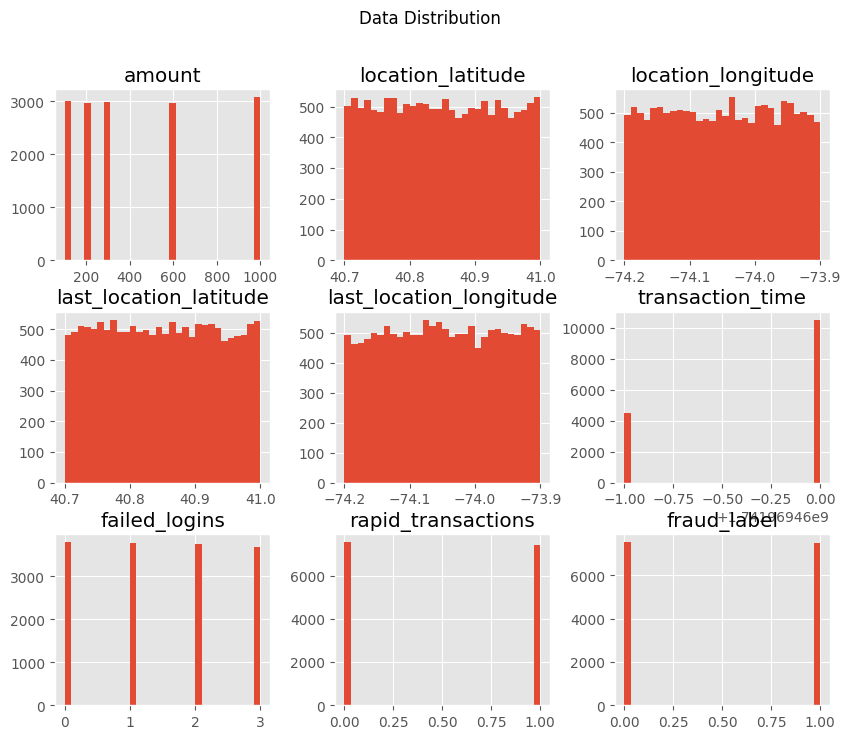

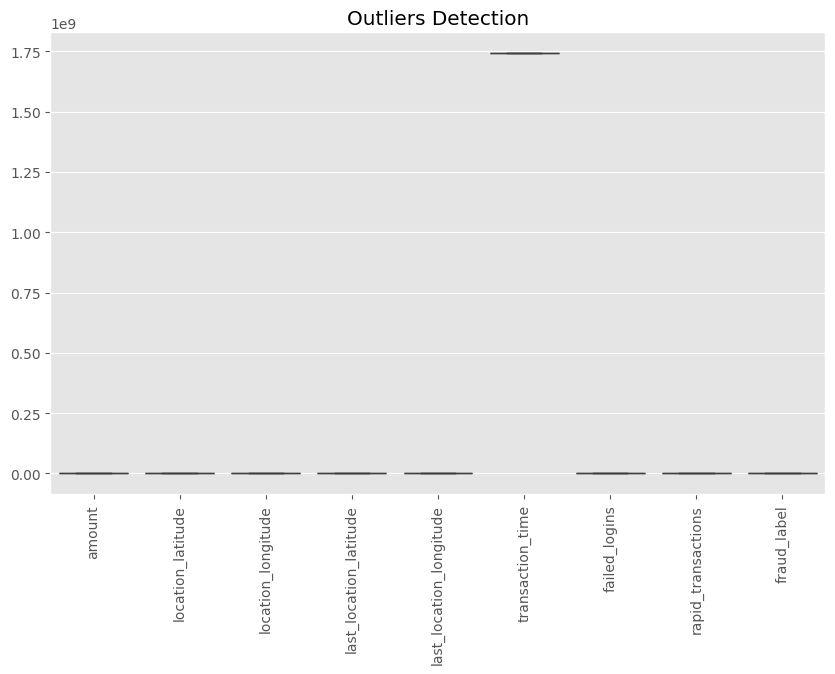

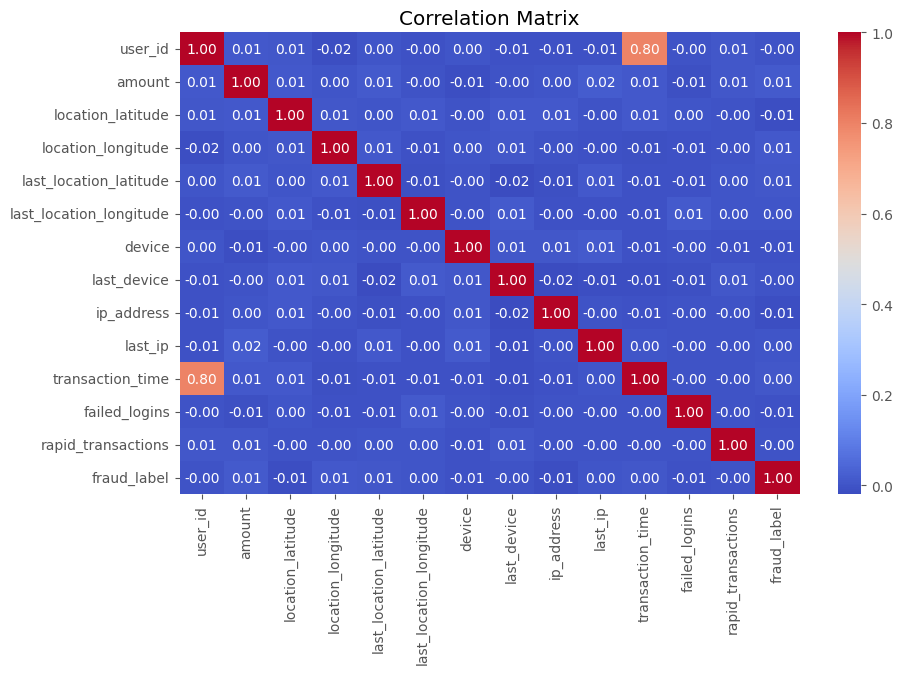

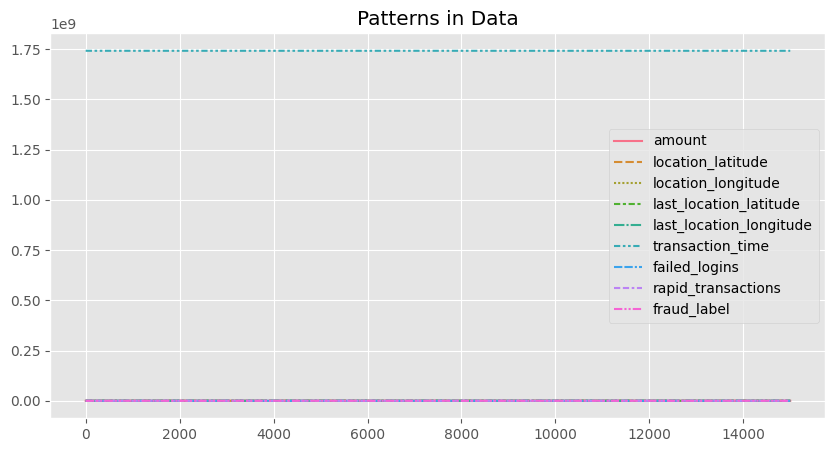


Duplicate Rows: 0

Summary Statistics:
              amount  location_latitude  location_longitude  \
count  15000.000000       15000.000000        15000.000000   
mean     442.973333          40.849306          -74.050024   
std      328.350139           0.086943            0.086636   
min      100.000000          40.700000          -74.199982   
25%      200.000000          40.773860          -74.125359   
50%      300.000000          40.848592          -74.049549   
75%      600.000000          40.924773          -73.974869   
max     1000.000000          40.999993          -73.900009   

       last_location_latitude  last_location_longitude  transaction_time  \
count            15000.000000             15000.000000      1.500000e+04   
mean                40.849702               -74.048922      1.741969e+09   
std                  0.086608                 0.086249      4.578351e-01   
min                 40.700000               -74.199973      1.741969e+09   
25%                 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/fraud_detection_dataset_5000.csv")

# Display first few rows
print("Dataset Preview:\n", df.head())


print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Data distribution
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Data Distribution")
plt.show()

# Detect outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Outliers Detection")
plt.xticks(rotation=90)
plt.show()

# Convert categorical columns to numeric for correlation analysis
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Line plot for pattern detection (select a numerical column)
if not df.select_dtypes(include=[np.number]).empty:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df.select_dtypes(include=[np.number]))
    plt.title("Patterns in Data")
    plt.show()

# Data quality check: Checking duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Ensure X and y are defined properly before splitting
# Split data into training (80%) and testing (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data for models sensitive to scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with optimized hyperparameters
classifiers = {
    # 'Logistic Regression': LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42),
    # 'Decision Tree': DecisionTreeClassifier(max_depth=15, class_weight='balanced', random_state=42),
    # 'SVM': SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    # 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    # 'Gradient Boosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42),
    # 'XGBoost': XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

best_model = None
best_f1_score = 0
best_model_name = ""

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")

    # Scale data only for models that require it
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Store the best performing model
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = clf
        best_model_name = name

# Print the best model based on F1-score
print(f"\nBest Model: {best_model_name} with F1 Score: {best_f1_score:.4f}")



Training Random Forest...

Random Forest Performance:
  Accuracy: 0.4797
  Precision: 0.4765
  Recall: 0.4475
  F1 Score: 0.4615

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.51      0.50      1505
           1       0.48      0.45      0.46      1495

    accuracy                           0.48      3000
   macro avg       0.48      0.48      0.48      3000
weighted avg       0.48      0.48      0.48      3000


Best Model: Random Forest with F1 Score: 0.4615


In [ ]:
import joblib
joblib.dump(clf, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

In [ ]:
# Load model
model = joblib.load("fraud_detection_model.pkl")


# Index	Value	Feature Name	Description
# 0	1000	Transaction Amount	The amount of money (e.g., in USD) involved in the transaction. Higher amounts may have a higher risk of fraud.
# 1	40.8857	Location Latitude	The latitude of the transaction location.
# 2	-74.1868	Location Longitude	The longitude of the transaction location.
# 3	1	Failed Login Attempts	The number of failed login attempts before this transaction. More failed attempts may indicate a fraud attempt.
# 4	0	Rapid Transactions	Whether the user made multiple transactions in a short period (e.g., 1 for yes, 0 for no).
# 5	0	New Device Usage	Whether the transaction was made from a new device (1 for yes, 0 for no).
# 6	2	Distance Traveled	The distance (e.g., in kilometers) between this transaction and the last known transaction. Unusually large distances might be suspicious.
# 7	0.5	Transaction Hour Factor	A normalized value representing the time of the transaction. Certain hours (like late night) may have higher fraud risk.
# 8	0	IP Address Change	Whether the transaction was made from a different IP than the last login (1 for yes, 0 for no).
# 9	0	Device Change	Whether the device used for the transaction is different from the last device used (1 for yes, 0 for no).
# 10	0	Fraud Label (Optional)	Label indicating whether the transaction is fraudulent (1) or legitimate (0). This is only present in labeled data used for training.


new_transaction = np.array([[1000, 40.8857, -74.1868, 1, 0, 0, 2, 0.5, 0, 0, 0 ]])  # Example input with 11 features - replace with actual data

prediction = model.predict(new_transaction)

print("Fraud Prediction:", "Fraudulent" if prediction[0] == 1 else "Legitimate")

Fraud Prediction: Legitimate


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#import joblib
# def predict_transaction_type(model, transaction_data):
#     """Predict the type of credit card transaction using the loaded model."""
#     return model.predict([transaction_data])[0]
# # Load model
# model = joblib.load("fraud_detection_model.pkl")
# transaction_data = [1000, 40.8857, -74.1868, 1, 0, 0, 2, 0.5, 0, 0, 0 ]
# predicted_type = predict_transaction_type(model, transaction_data)
# print(predicted_type)  # Output: 'CASH_OUT'
# # ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
# debug it

import joblib
import numpy as np

def predict_transaction_type(model, transaction_data):
    """Predict the type of credit card transaction using the loaded model."""
    # Reshape the input data to a 2D array as the model expects
    transaction_data = np.array([transaction_data])
    return model.predict(transaction_data)[0]

# Load model
model = joblib.load("fraud_detection_model.pkl")

transaction_data = [1000, 40.8857, -74.1868, 1, 0, 0, 2, 0.5, 0, 0, 0]
predicted_type = predict_transaction_type(model, transaction_data)

print(predicted_type)  # Output will be either 0 (legitimate) or 1 (fraudulent)

if predicted_type == 0:
    print("Normal Transaction")
else:
    print("Fraudulent Transaction")


0
Normal Transaction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
